## Simple logistic regression

Learn to fit logistic regression models. Using real-world data, you’ll predict the likelihood of a customer closing their bank account as probabilities of success and odds ratios, and quantify model performance using confusion matrices.

### Exploring the explanatory variables
When the response variable is logical, all the points lie on the y equals zero and y equals one lines, making it difficult to see what is happening. In the video, until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line. This can be solved with a histogram of the explanatory variable, faceted on the response.

'data.frame':	400 obs. of  3 variables:
 $ has_churned              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ time_since_first_purchase: num  -1.0892 1.183 -0.8462 0.0869 -1.1666 ...
 $ time_since_last_purchase : num  -0.721 3.634 -0.428 -0.536 -0.673 ...


has_churned,time_since_first_purchase,time_since_last_purchase
0,-1.08922097,-0.7213215
0,1.18298297,3.6344354
0,-0.84615637,-0.4275823
0,0.08694165,-0.5356717
0,-1.16664155,-0.6726400
0,0.49339968,-0.7700030


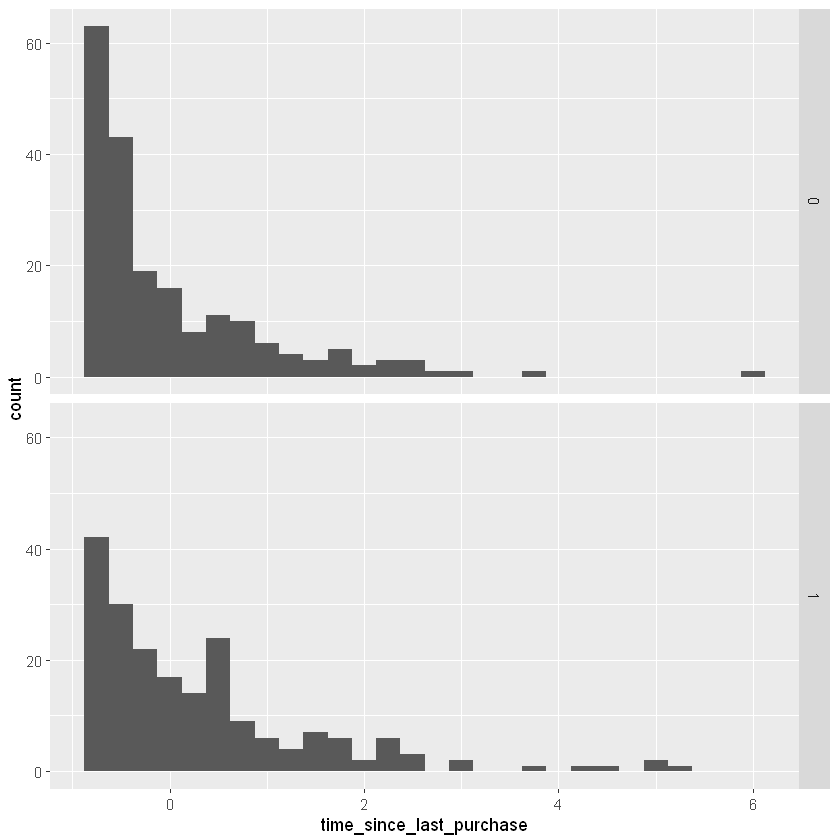

In [4]:
# libraries
library(fst)
library(ggplot2)
library(dplyr)
library(broom)

# read and see data 
churn = read_fst("churn.fst")
str(churn)
head(churn)

# Using churn, plot time_since_last_purchase
ggplot(churn, aes(time_since_last_purchase)) +
  # as a histogram with binwidth 0.25
  geom_histogram(binwidth = 0.25) +
  # faceted in a grid with has_churned on each row
  facet_grid(has_churned~.)


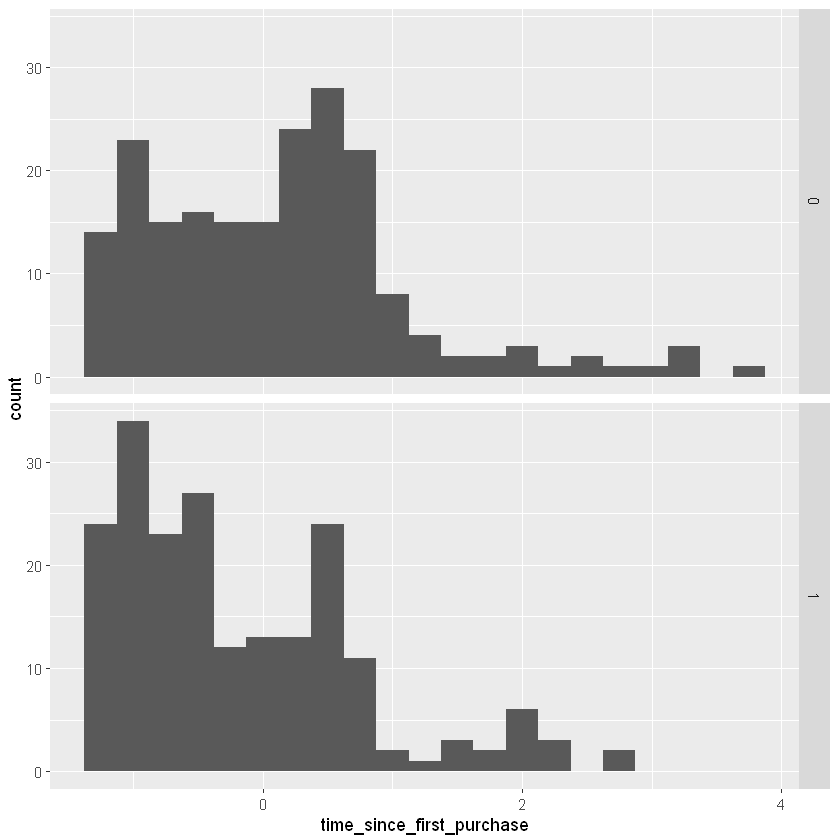

In [5]:
# Redraw the plot with time_since_first_purchase
ggplot(churn, aes(time_since_first_purchase)) +
  # as a histogram with binwidth 0.25
  geom_histogram(binwidth = 0.25) +
  # faceted in a grid with has_churned on each row
  facet_grid(has_churned~.)

### Visualizing linear and logistic models
As with linear regressions, ggplot2 will draw model predictions for a logistic regression without you having to worry about the modeling code yourself. To see how the predictions differ for linear and logistic regressions, try drawing both trend lines side by side. Spoiler: you should see a linear (straight line) trend from the linear model, and a logistic (S-shaped) trend from the logistic model.

`geom_smooth()` using formula 'y ~ x'


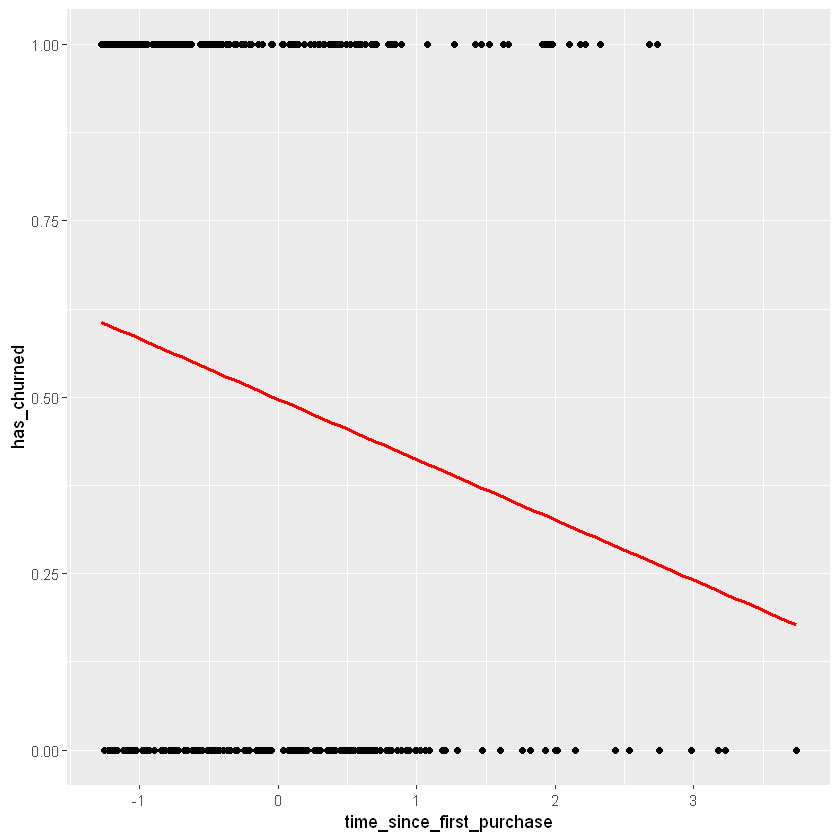

In [6]:
# Using churn plot has_churned vs. time_since_first_purchase
ggplot(churn, aes(x =time_since_first_purchase , y = has_churned )) +
  # Make it a scatter plot
  geom_point() +
  # Add an lm trend line, no std error ribbon, colored red
  geom_smooth(method = "lm", se = FALSE, color = "red")

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


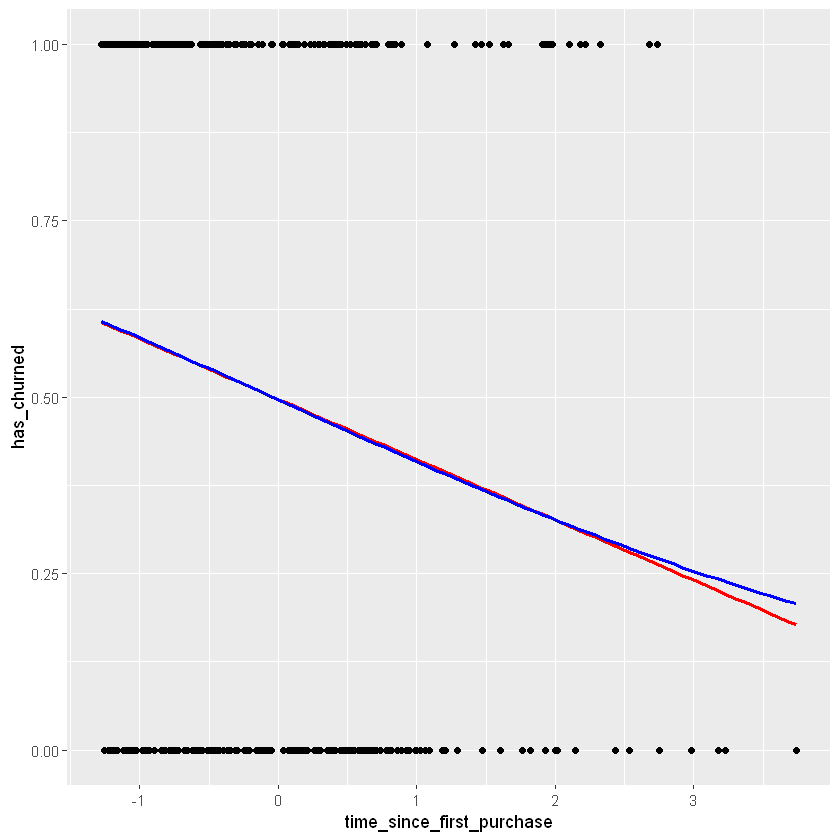

In [10]:
plt_churn_vs_relationship <- ggplot(churn, aes(time_since_first_purchase, has_churned)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  # Add a glm trend line, no std error ribbon, binomial family
  geom_smooth(method = "glm", se = FALSE, method.args = list(family = "binomial"), color = "blue")

plt_churn_vs_relationship

### Logistic regression with glm()
Linear regression and logistic regression are special cases of a broader type of models called generalized linear models ("GLMs"). A linear regression makes the assumption that the residuals follow a Gaussian (normal) distribution. By contrast, a logistic regression assumes that residuals follow a binomial distribution.

Here, you'll model how the length of relationship with a customer affects churn.

In [28]:
# Fit a logistic regression of churn vs. 
# length of relationship using the churn dataset
mdl_churn_vs_relationship <- glm(has_churned ~ time_since_first_purchase, data = churn, family = "binomial"(link = "logit"))
# with probit
mdl_churn_vs_relationship <- glm(has_churned ~ time_since_first_purchase, data = churn, family = "binomial"(link = "logit"))

# See the result
mdl_churn_vs_relationship


Call:  glm(formula = has_churned ~ time_since_first_purchase, family = binomial(link = "logit"), 
    data = churn)

Coefficients:
              (Intercept)  time_since_first_purchase  
                 -0.01518                   -0.35479  

Degrees of Freedom: 399 Total (i.e. Null);  398 Residual
Null Deviance:	    554.5 
Residual Deviance: 543.7 	AIC: 547.7

In [34]:
# with probit
mdl_churn_vs_relationship <- glm(has_churned ~ time_since_first_purchase, data = churn, family = "binomial"(link = "probit"))
# See the result
mdl_churn_vs_relationship
# the only difference is the underlying distribution, probit is with normal distribution and logit is with logistic distribution
#(see https://www.econometrics-with-r.org/11-2-palr.html)



Call:  glm(formula = has_churned ~ time_since_first_purchase, family = binomial(link = "probit"), 
    data = churn)

Coefficients:
              (Intercept)  time_since_first_purchase  
                -0.008408                  -0.219847  

Degrees of Freedom: 399 Total (i.e. Null);  398 Residual
Null Deviance:	    554.5 
Residual Deviance: 543.8 	AIC: 547.8

### Probabilities
There are four main ways of expressing the prediction from a logistic regression model – we'll look at each of them over the next four exercises. Firstly, since the response variable is either "yes" or "no", you can make a prediction of the probability of a "yes". Here, you'll calculate and visualize these probabilities.

Three variables are available:

1. mdl_churn_vs_relationship is the logistic regression model of has_churned versus time_since_first_purchase.
2. explanatory_data is a data frame of explanatory values.
3. plt_churn_vs_relationship is a scatter plot of has_churned versus time_since_first_purchase with a smooth glm line.

time_since_first_purchase,has_churned
-1.50,0.6264479
-1.25,0.6054699
-1.00,0.5840959
-0.75,0.5624009
-0.50,0.5404646
-0.25,0.5183703
0.00,0.4962039
0.25,0.4740525
0.50,0.4520027
0.75,0.4301398


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


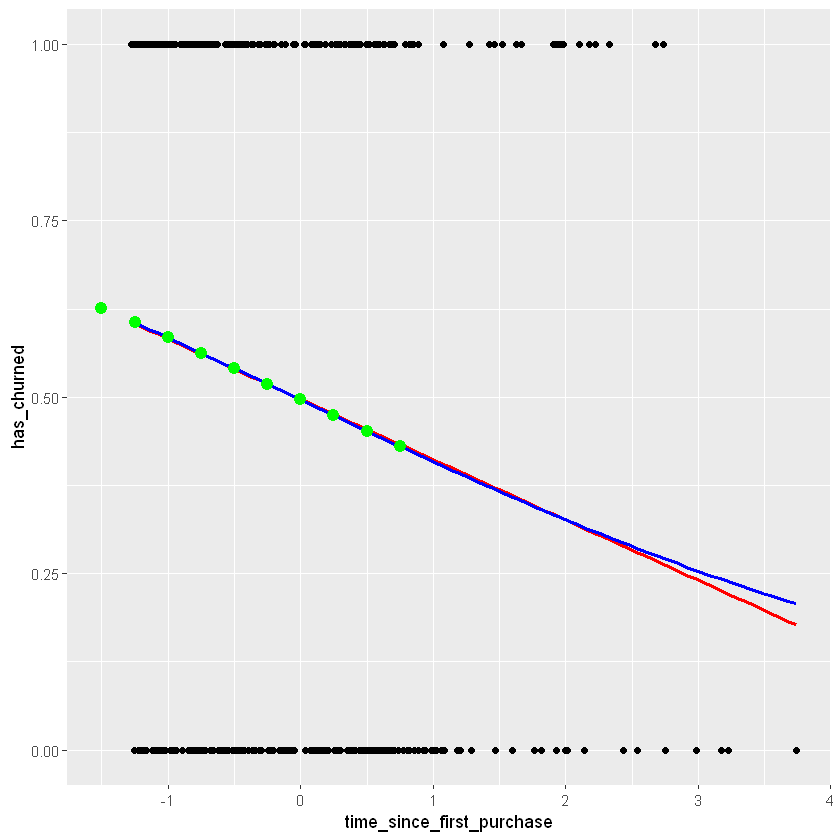

In [19]:
explanatory_data = tibble(time_since_first_purchase = seq(-1.5, 0.75, 0.25))

# Make a data frame of predicted probabilities
prediction_data <- explanatory_data %>% 
  mutate(has_churned = predict(mdl_churn_vs_relationship, explanatory_data, type = "response"))

# See the result
prediction_data


# Update the plot
plt_churn_vs_relationship +
  # Add points from prediction_data, colored green, size 3
  geom_point(data = prediction_data, color = "green", size = 3)

### Most likely outcome
When explaining your results to a non-technical audience, you may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn. The tradeoff here is easier interpretation at the cost of nuance.

In [20]:
# Update the data frame
prediction_data <- explanatory_data %>% 
  mutate(has_churned = predict(mdl_churn_vs_relationship, explanatory_data, type = "response"),
    # Add the most likely churn outcome
    most_likely_outcome = round(has_churned))

# See the result
prediction_data

time_since_first_purchase,has_churned,most_likely_outcome
-1.50,0.6264479,1
-1.25,0.6054699,1
-1.00,0.5840959,1
-0.75,0.5624009,1
-0.50,0.5404646,1
-0.25,0.5183703,1
0.00,0.4962039,0
0.25,0.4740525,0
0.50,0.4520027,0
0.75,0.4301398,0


`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


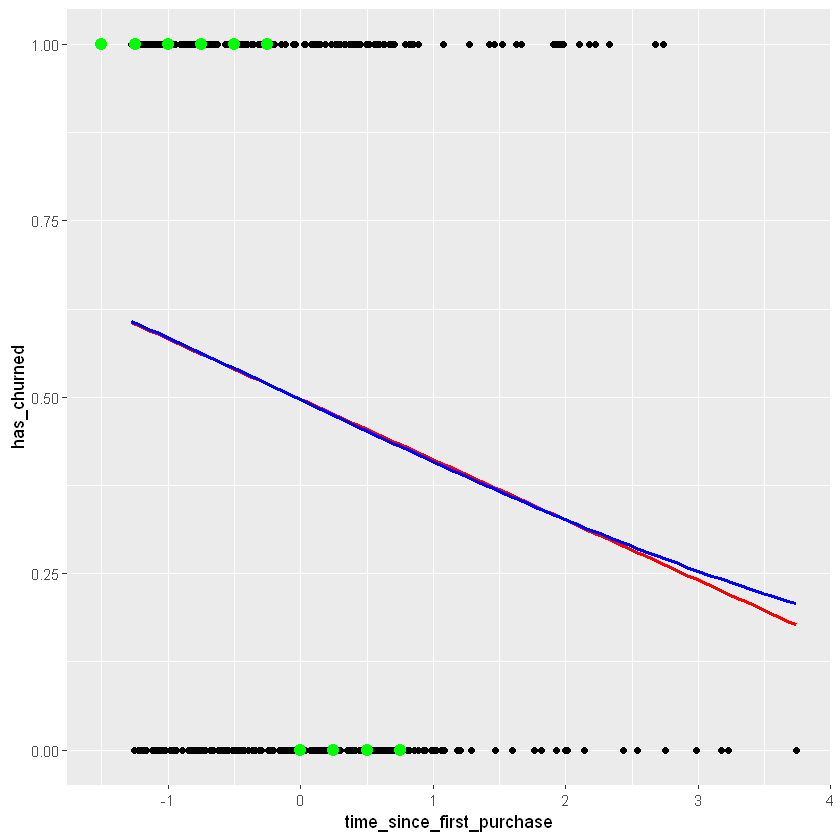

In [21]:
# Update the plot
plt_churn_vs_relationship +
  # Add most likely outcome points from prediction_data, 
  # colored green, size 3
  geom_point(aes(y = most_likely_outcome), data = prediction_data, color = "green", size = 3)

### Odds ratio
Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it maybe more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it maybe more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

In [22]:
# Update the data frame
prediction_data <- explanatory_data %>% 
  mutate(has_churned = predict(mdl_churn_vs_relationship, explanatory_data, type = "response"),
    # Add the odds ratio
    odds_ratio = has_churned/(1 - has_churned))

# See the result
prediction_data

time_since_first_purchase,has_churned,odds_ratio
-1.50,0.6264479,1.6770025
-1.25,0.6054699,1.5346606
-1.00,0.5840959,1.4044004
-0.75,0.5624009,1.2851966
-0.50,0.5404646,1.1761107
-0.25,0.5183703,1.0762839
0.00,0.4962039,0.9849302
0.25,0.4740525,0.9013305
0.50,0.4520027,0.8248267
0.75,0.4301398,0.7548164


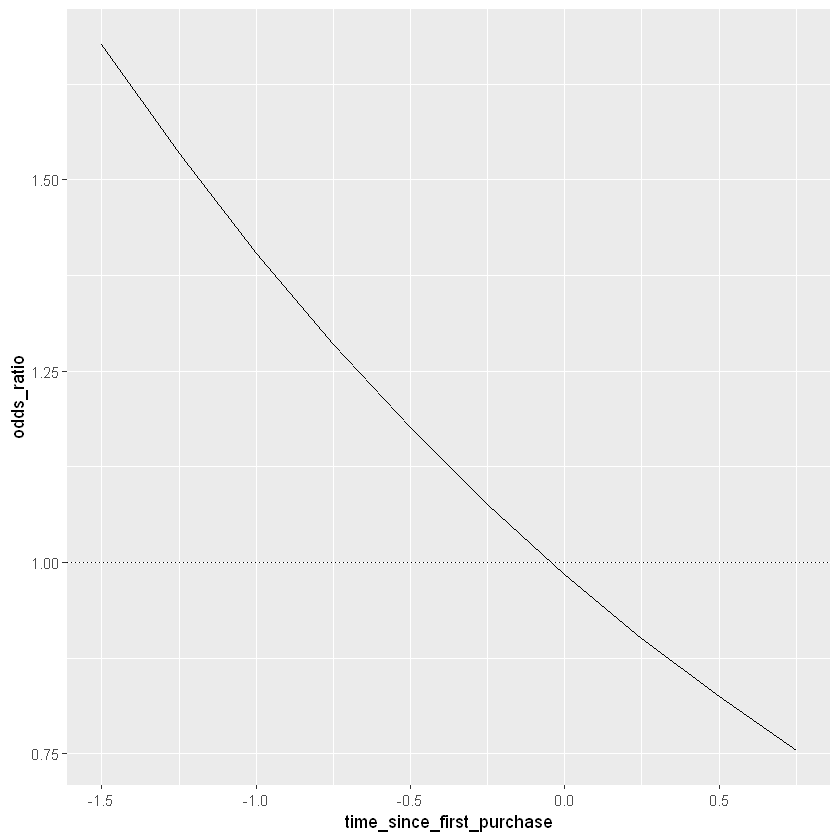

In [23]:
# Using prediction_data, plot odds_ratio vs. time_since_first_purchase
ggplot(prediction_data, aes(x = time_since_first_purchase, y = odds_ratio)) +
  # Make it a line plot
  geom_line() +
  # Add a dotted horizontal line at y = 1
  geom_hline(yintercept = 1, linetype = "dotted")

### Log odds ratio
One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.

In [24]:
# Update the data frame
prediction_data <- explanatory_data %>% 
  mutate(has_churned = predict(mdl_churn_vs_relationship, explanatory_data, type = "response"),
    odds_ratio = has_churned / (1 - has_churned),
    # Add the log odds ratio from odds_ratio
    log_odds_ratio = log(odds_ratio),
    # Add the log odds ratio using predict()
    log_odds_ratio2 = predict(mdl_churn_vs_relationship, explanatory_data)) # without type = "response"

# See the result
prediction_data

time_since_first_purchase,has_churned,odds_ratio,log_odds_ratio,log_odds_ratio2
-1.50,0.6264479,1.6770025,0.51700798,0.51700798
-1.25,0.6054699,1.5346606,0.42830923,0.42830923
-1.00,0.5840959,1.4044004,0.33961048,0.33961048
-0.75,0.5624009,1.2851966,0.25091173,0.25091173
-0.50,0.5404646,1.1761107,0.16221298,0.16221298
-0.25,0.5183703,1.0762839,0.07351423,0.07351423
0.00,0.4962039,0.9849302,-0.01518451,-0.01518451
0.25,0.4740525,0.9013305,-0.10388326,-0.10388326
0.50,0.4520027,0.8248267,-0.19258201,-0.19258201
0.75,0.4301398,0.7548164,-0.28128076,-0.28128076


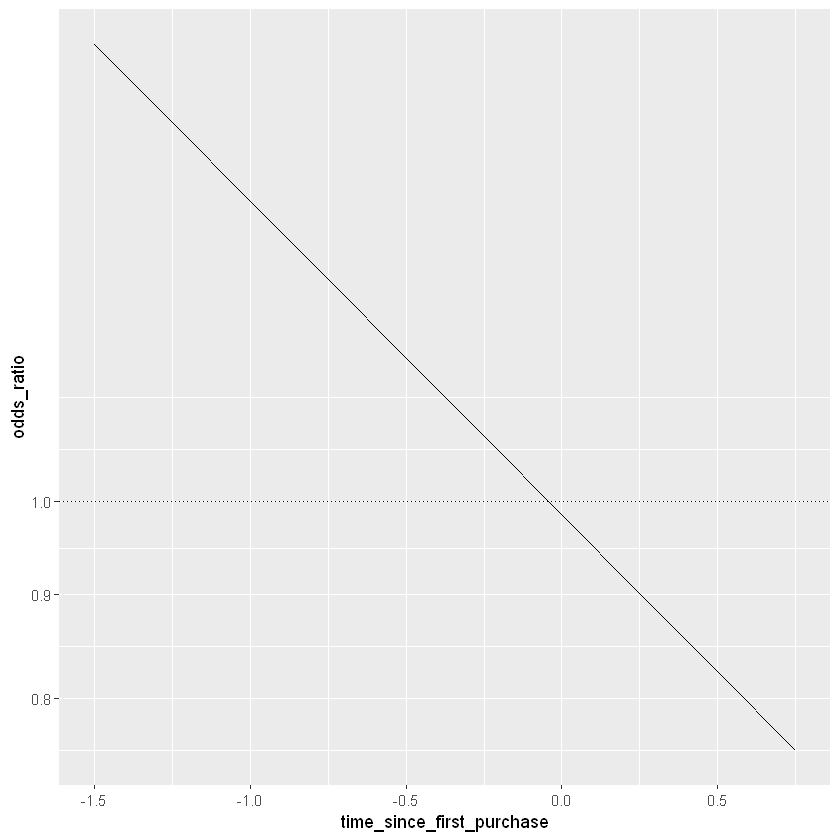

In [25]:
# Update the plot
ggplot(prediction_data, aes(time_since_first_purchase, odds_ratio)) +
  geom_line() +
  geom_hline(yintercept = 1, linetype = "dotted") +
  # Use a logarithmic y-scale
  scale_y_log10()

### Calculating the confusion matrix
A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

1. The customer churned and the model predicted that.
2. The customer churned but the model didn't predict that.
3. The customer didn't churn but the model predicted they did.
4. The customer didn't churn and the model predicted that.

In [31]:
# Get the actual responses from the dataset
actual_response <- churn$has_churned

# Get the "most likely" predicted responses from the model
predicted_response <- round(fitted(mdl_churn_vs_relationship))

# Create a table of counts
outcomes <- table(predicted_response, actual_response)

# See the result
outcomes

                  actual_response
predicted_response   0   1
                 0 112  76
                 1  88 124

### Measuring logistic model performance
Having the confusion matrix as a table object is OK, but a little hard to program with. By converting this to a yardstick confusion matrix object, you get methods for plotting and extracting performance metrics.

also installing the dependencies 'rlang', 'vctrs'



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Migue\Anaconda3\envs\withR\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\Migue\Anaconda3\envs\withR\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'vctrs' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'vctrs'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Migue\Anaconda3\envs\withR\Lib\R\library\00LOCK\vctrs\libs\x64\vctrs.dll to C:\Users\Migue\Anaconda3\envs\withR\Lib\R\library\vctrs\libs\x64\vctrs.dll: Permission denied"Warning message:
"restored 'vctrs'"

package 'yardstick' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Migue\AppData\Local\Temp\Rtmp8K5yhv\downloaded_packages


Warning message:
"package 'yardstick' was built under R version 3.6.3"For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.


.metric,.estimator,.estimate
accuracy,binary,0.5900000
kap,binary,0.1800000
sens,binary,0.6200000
spec,binary,0.5600000
ppv,binary,0.5849057
npv,binary,0.5957447
mcc,binary,0.1803249
j_index,binary,0.1800000
bal_accuracy,binary,0.5900000
detection_prevalence,binary,0.5300000


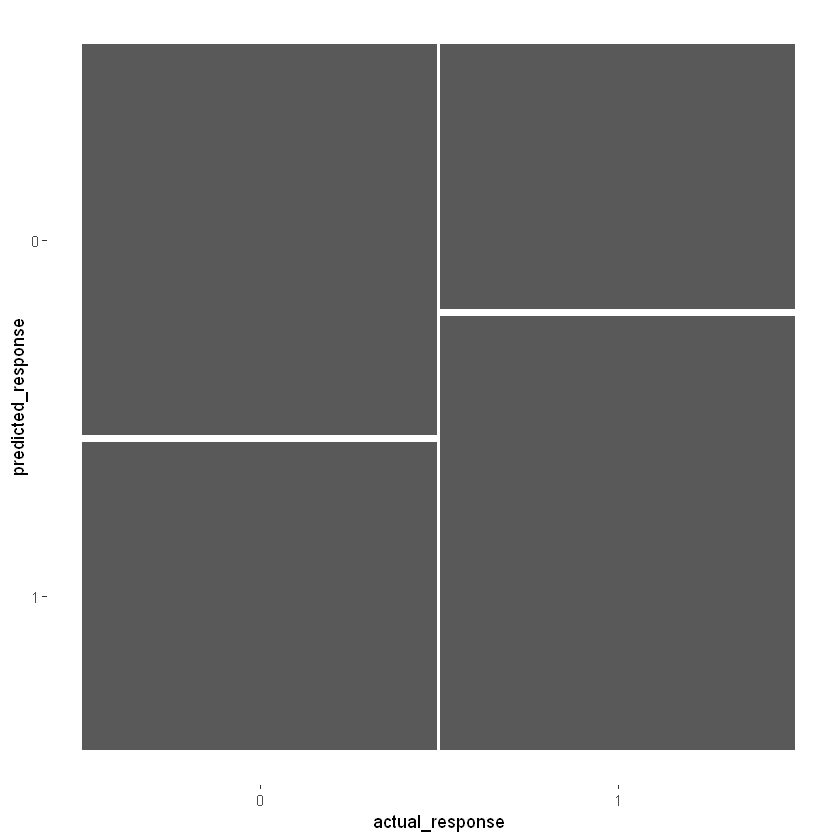

In [32]:
install.packages("yardstick")
library(yardstick)

# Convert outcomes to a yardstick confusion matrix
confusion <- conf_mat(outcomes)

# Plot the confusion matrix
autoplot(confusion)

# Get performance metrics for the confusion matrix
summary(confusion, event_level = "second")